In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dados_resultados = pd.read_csv("../DADOS/resultados.csv", sep=";", encoding="latin1")

In [ ]:

dados_resultados = dados_resultados.drop(['NU_SEQUENCIAL', 'NU_ANO', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'CO_MUNICIPIO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT','TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT','TP_LINGUA', 'TP_STATUS_REDACAO','TX_GABARITO_CN', 'TX_GABARITO_CH','TX_GABARITO_LC', 'TX_GABARITO_MT'], axis=1)

dados_resultados = dados_resultados.rename(columns={"SG_UF_PROVA" : "Estado", "TP_DEPENDENCIA_ADM_ESC" : "Publica/Privada",})

coluna_essenciais = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Estado', 'Publica/Privada']

dados_resultados.dropna(subset=coluna_essenciais, inplace=True)

In [ ]:
print(dados_resultados.head())

criacao da coluna de media total

In [ ]:
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_resultados['MEDIA'] = dados_resultados[colunas_notas].mean(axis=1)
print(dados_resultados.head())

separacao de escolas publicas e privadas

In [ ]:
map_tp_escola = {1: 'Publica', 2: 'Publica', 3: 'Publica', 4: 'Privada'}

In [ ]:
dados_resultados["Publica/Privada"] = dados_resultados["Publica/Privada"].replace(map_tp_escola)
print(dados_resultados.head()) 

geração das medias das escolas publicas e privadas

In [22]:
dados_publica = dados_resultados[dados_resultados["Publica/Privada"] == "Publica"]
dados_privada = dados_resultados[dados_resultados["Publica/Privada"] == "Privada"]

media_geral = dados_resultados["MEDIA"].mean()
media_publica = dados_publica["MEDIA"].mean()
media_privada = dados_privada["MEDIA"].mean()

print(f"Média das escolas públicas: {media_publica:.2f}")
print(f"Média das escolas privadas: {media_privada:.2f}")
print(f"Média geral: {media_geral:.2f}")

Média das escolas públicas: 510.90
Média das escolas privadas: 614.56
Média geral: 532.12


criação do grafico de barras das medias 

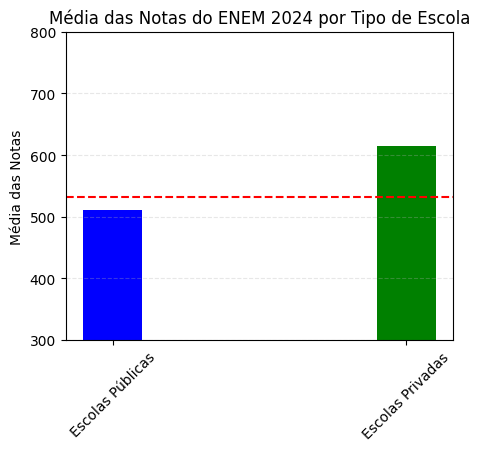

In [51]:
plt.figure(figsize=(5, 4))
categorias = ['Escolas Públicas', 'Escolas Privadas']
medias = [media_publica, media_privada]
cores = ['blue', 'green']
plt.bar(categorias, medias, color=cores, width=0.2)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.ylim(300, 800)
plt.ylabel('Média das Notas')
plt.title('Média das Notas do ENEM 2024 por Tipo de Escola')
plt.axline(( 1, media_geral), slope=0, color='red', linestyle='--', label='Média Geral')